<a href="https://colab.research.google.com/github/yayie77/Concepts-and-Technologies-of-AI/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Classification-Introduction:**

In Statistics and Machine Learning, classification is a type of supervised learning task, where training data with known class labels are given and are used to estimate a function, which can map a unseen  features (Idependent  Variables $X$) to its class label (Dependent Variable $Y$) .

Tasks in Supervised Learning-Classification Task can be:
  *   Binary Classification.
  *   Multiclass Classification.

This Notebook consist of One Sections:
  *   Section-1: This section will discuss how can we use Logistic Regression to perform Binary Classification Task.
    *   We also describe various helper function such as Sigmoid Function, Cost fucntion and disccuss.

Author-Siman Giri.

# Section-1: Binary Classification with Logistic Regression.

___



## Helper Function:

Let's discuss two function we need to further implement logistic regression.
  1.   Sigmoid Function.
  2.   Cost(Loss) Function.

___




### Sigmoid Function:
A function  $[g : R -> R] $  is said to be a sigmoid function, if the function is bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly on inflection point. The sigmoid fucntion has a characterstic "S" shaped curved also known as sigmoid curve.  [--- Wikipedia]

A comon example of a sigmoid function is the logistic function described as below:
$$ g(x) = \frac{1}{1+e^{-x}}, $$

for $x \in \mathbb{R}$.

The next two code blocks construct and plot this function.
___

In [ ]:
import numpy as np

In [ ]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  # Your Code here
  y =  1/(1+np.exp(-x))
  return y
# Test Function:
# For scalar:
x = 0
y = logistic_function(x)
print(f"logistic({x}) = {logistic_function(x)}")
# For Array:
x_arr = np.array([-3, -1, 1, 3])
y_arr = logistic_function(x_arr)
print(f"logistc({x_arr}) = {logistic_function(x_arr)}")


logistic(0) = 0.5
logistc([-3 -1  1  3]) = [0.04742587 0.26894142 0.73105858 0.95257413]


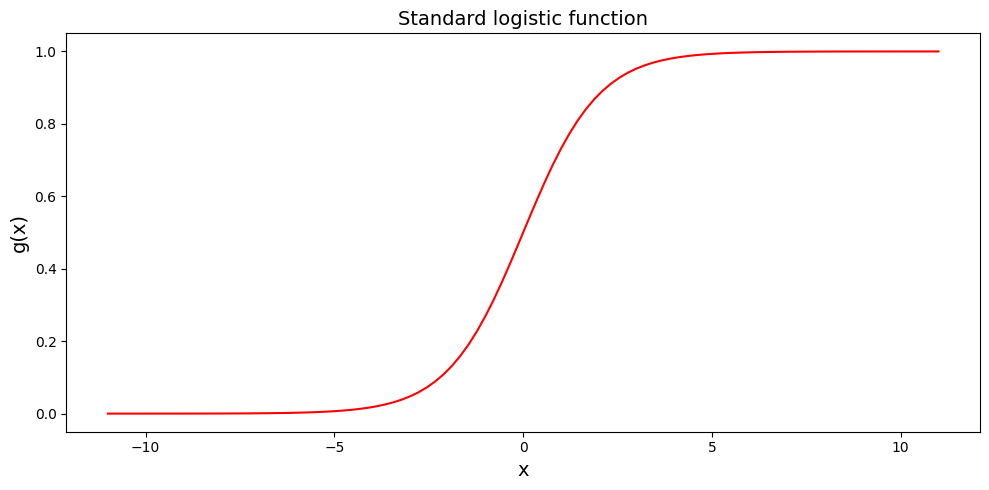

In [ ]:
# Plooting the sigmoid function:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 5))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic_function(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cost(Loss) Function:
Cost vs Loss Function:

In general, loss function corresponds to observed error value between target value and predicted value for single observation/data points whereas cost function represents the average loss over a group of observations/data points.

Due to the non-linearity introduced by logistic function in the function, we can not use squared loss as an loss function, instead we make use of log-loss function, given by:

$$ L(y, y') = -y \log\left(y'\right) - \left(1 - y\right) \log\left(1 - y'\right), $$

Where:
*   $y$ : True target value (taking values $0$ or $1$)
*   $y'$ : Predeicted target value ( predicted probability of $y$ being $1$ and vice versa.)

The basis intution behind the log-loss function is, the loss value should be minimum when our predicted probability values are closer to true target value.


In [ ]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  loss = -y_true*np.log(y_pred)-(1-y_true)*np.log(1-y_pred)
  return loss

# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


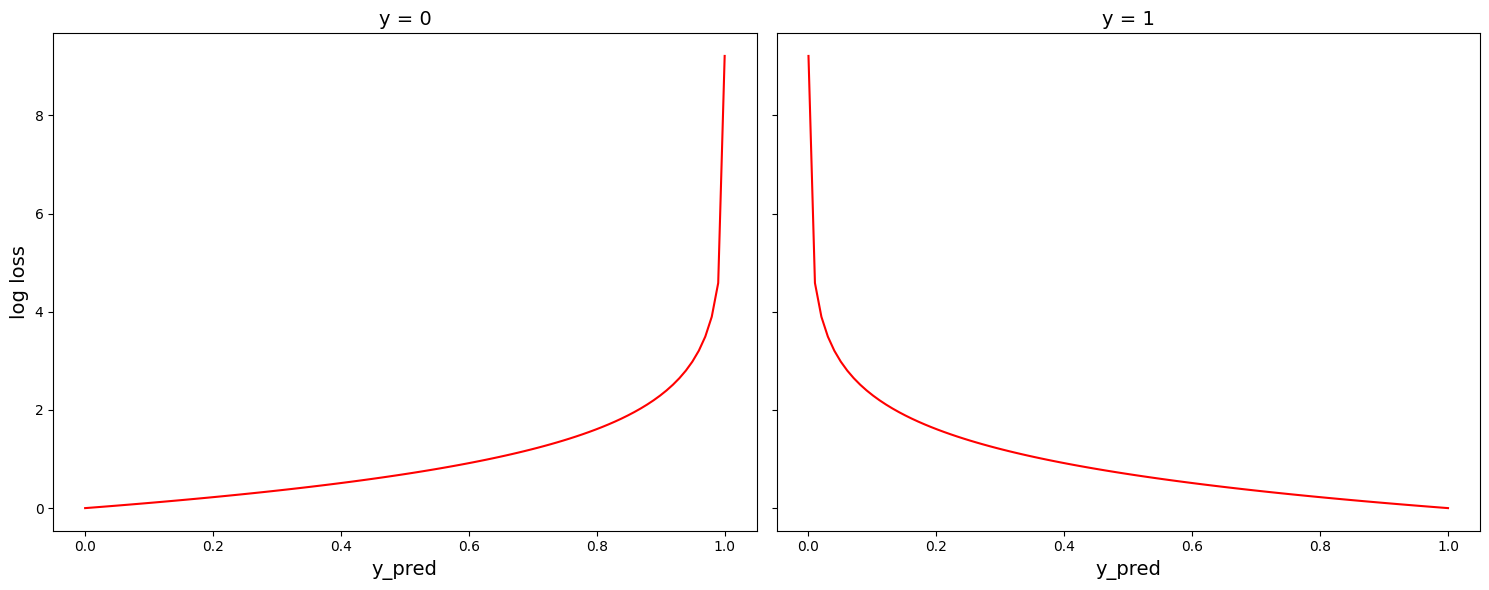

In [ ]:
# Plot the loss Function:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_pred = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_pred, log_loss(0, y_pred), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_pred", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_pred, log_loss(1, y_pred), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_pred", fontsize = 14)
plt.tight_layout()
plt.show()

### Cost Function:
As described above, we determine the cost function as an average of loss function value calculated for each observation/datapoints.

Let $y = (y_1,....,y_n)$ be the true target values{(0 or 1)}  and $y'=(y_1',....y_n')$ be the corresponding predicted target values in between {(0-1)}, then the cost function be:

$$ C(\mathbf{y}, \mathbf{y'}) = \frac{1}{n}\sum_{i = 1}^n L(y_i, y_i').\tag{0} $$


In [ ]:
# Cost function - using vectorization
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i],y_pred[i])for i in range(n)])
    cost = sum (loss_vec)/n
    return cost

y_true, y_pred = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_function({y_true}, {y_pred}) = {cost_function(y_true, y_pred)}")

cost_function([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


Extending the cost function for logistic regression to be used with model parameters.

Function we are estimating:

$$ y' = g\left(\mathbf{x} \cdot \mathbf{θ} + b\right) = \frac{1}{1 + e^{-\left(\mathbf{x} \cdot \mathbf{\theta} + b\right)}}. \tag{1} $$

Where:
- $\theta$ parameters (Coefficinet of feature variable) also known as weights.
-$b$ parameters ( intercept of the function) also known as bias.

Assume;
- X: Matirix of n independent variables;
- Y: Matrix of n dependent variables;
- Y': Matrix of n predicted variables; and are represented as follows:

$$ \mathbf{X} = \begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \newline
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \newline
\vdots & \vdots & \ddots & \vdots \newline
x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{pmatrix},\;\;\;\;
\mathbf{y} = \begin{pmatrix}
y_1 \newline
y_2 \newline
\vdots \newline
y_m
\end{pmatrix},\;\;\;\;
\mathbf{y'} = \begin{pmatrix}
g\left(\mathbf{x_1} \cdot \mathbf{\theta} + b\right) \newline
g\left(\mathbf{x_2} \cdot \mathbf{\theta} + b\right) \newline
\vdots \newline
g\left(\mathbf{x_n} \cdot \mathbf{\theta} + b\right)
\end{pmatrix}. \tag{2} $$

Now rewrite cost funtion defined in $(0)$ for model parameters as:

$$ J\left(\mathbf{w}, b\right) := C\left(\mathbf{y}, \mathbf{y'} \,\vert\, \mathbf{X}, \mathbf{w}, b \right) = \frac{1}{m}\sum_{i = 1}^m L\left(y_i, \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) $$
$$= \frac{1}{m}\sum_{i = 1}^m \left[ -y_i \log\left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) - \left(1 - y_i\right) \log\left(1 - \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) \right]. \tag{3} $$


In [ ]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = np.matmul(X,w)+np.dot(b,np.ones(n))
    y_pred = logistic_function(z)
    cost = cost_function(y,y_pred)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


### Gradient Descent Algorithm

The gradient descent algorithm is a first order iterative optimization algorithm for finding alocal minimum of a differentiable function.

The Algorithm:
$$ \begin{align*}
& \text{repeat until convergence:}\; \{ \newline
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j},\; \text{ for } j = 1, 2, \ldots, n; \newline
& b := b -  \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b}. \tag{4} \newline
& \}
\end{align*} $$

- where $\alpha$ is the learning rate, and the parameters $\mathbf{w} = (w_1, w_2, \cdots, w_n)$ and $b$ are updated simultaniously in each iteration.




**Compute Gradient:**

Before we can implement the gradient descent algorithm, we need to compute the gradients, which are the partial derivatives of cost function $J(w,b)$ and are as follows:


$$ \begin{align*}
& \frac{\partial J(\mathbf{w},b)}{\partial w_j} = \frac{1}{m} \sum\limits_{i = 1}^m \left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}} - y_i\right) x_{i,j},\;\; \text{ for } j = 1, 2, \ldots, n; \newline
& \frac{\partial J(\mathbf{w}, b)}{\partial b} = \frac{1}{m} \sum\limits_{i = 1}^m \left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}} - y_i\right).
\end{align*} $$

In [ ]:
# Function to compute gradients of the cost function with respect to model parameters - using vectorization
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_pred = logistic_function(np.matmul(X,w)+b)
    grad_w = np.matmul(X.T,y_pred-y)/m
    grad_b = np.sum(y_pred-y)/m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"gradient of logistic regression parameters (X = {X}, y = {y}, w = {w}, b = {b}) = {compute_gradient(X, y, w, b)}")

gradient of logistic regression parameters (X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


**Implement Gradient Descent for Logistic Regression.**

In [ ]:
# Gradient descent algorithm for logistic regression
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False):
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    from tqdm.contrib import itertools
    import math
    import tqdm
    from time import sleep
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w += -alpha*grad_w
        b += -alpha*grad_b
        cost =  costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])


    return w, b, cost_history, params_history

X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 100000
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost = False, show_params = False)

  0%|          | 0/100000 [00:00<?, ?it/s]

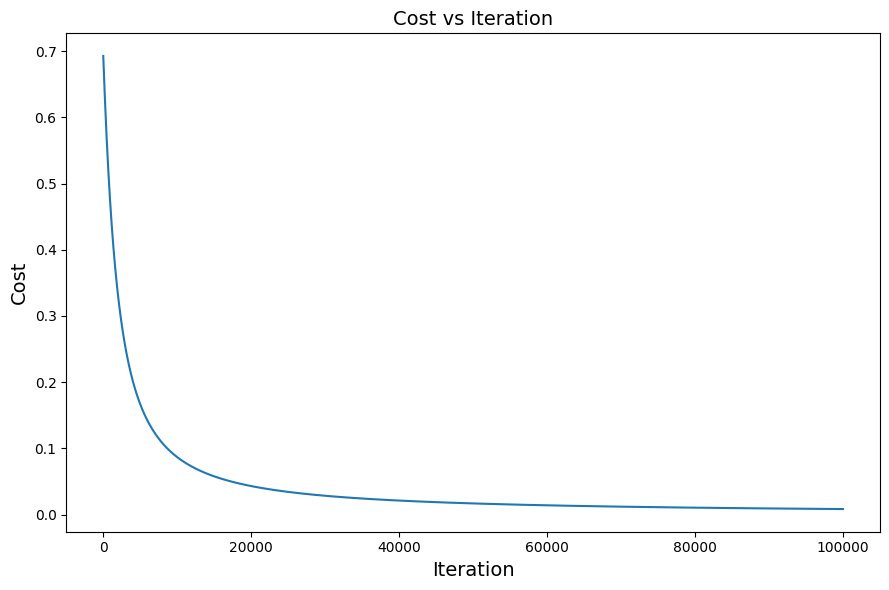

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

# Logistic Regression-Scratch Implementation.

In [ ]:
path_dataset = "/content/drive/MyDrive/Iris.csv"

In [ ]:
w_out = [0,0,0,0]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv(path_dataset)

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

print(data.shape)

(150, 6)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data = data.drop(["Id"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.Species = data.Species.replace(data.Species.unique(),[*range(len(data.Species.unique()))])

<ipython-input-70-6479304f4cb5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.Species = data.Species.replace(data.Species.unique(),[*range(len(data.Species.unique()))])


In [ ]:
binary_iris = data[data.Species!=2].reset_index(drop=True)
binary_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
X = binary_iris.iloc[:, :-1].values
Y = binary_iris.iloc[:,-1].values


In [ ]:
# Sanity Check:
if X.shape[0] == Y.shape[0]:
  print("Progress Further")
else:
  print("X and Y are not created correctly")

Progress Further


# Train Test Split:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Sanity Check:
if x_train.shape[0] == y_train.shape[0]:
  print("Progress Further")
else:
  print("x_train and y_train are not created correctly")


Progress Further


# Model Fitting:

Training of the Model:


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x, y, w, b):
    m = x.shape[0]
    z = np.dot(x, w) + b
    y_pred = sigmoid(z)
    cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

def gradient_descent(x, y, w, b, alpha, n_iter):
    m = x.shape[0]
    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Predictions
        z = np.dot(x, w) + b
        y_pred = sigmoid(z)

        # Gradients
        dw = (1 / m) * np.dot(x.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        w -= alpha * dw
        b -= alpha * db

        # Compute and store cost
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history, params_history


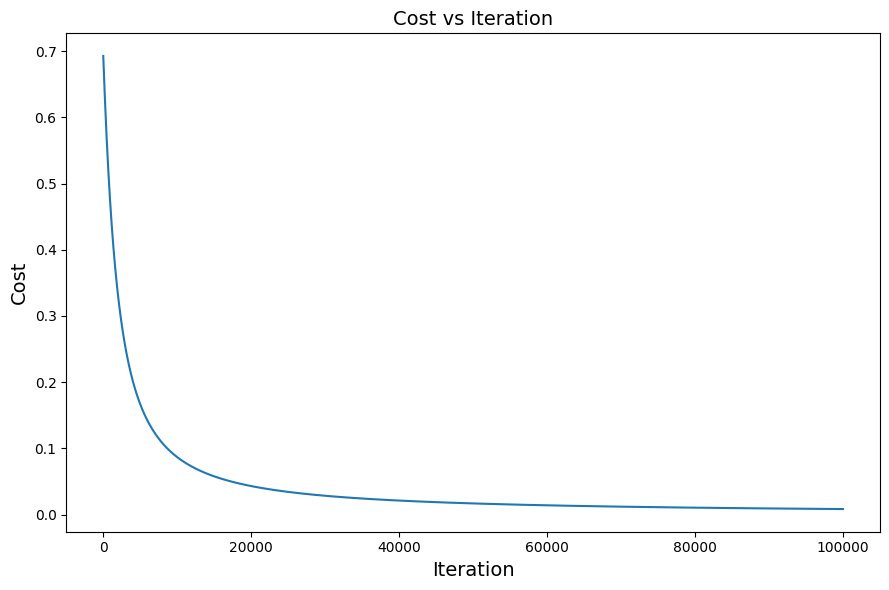

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

### **Prediction and Decision Boundry**
- Prediction:

  - Utilizing our trained weights and biases we first find the probabilities values y_probab for the x_test.
Then, Y_probabiliy value is transformed to discrete class value using Decision boubdry.
___
- Decision Boundry:
  - We first calculate the y_prediction as probabilities value, which is then converted to discrete class by using a threshold value. For instance, we take the threshold to be 0.5,then we classify the observation to class 1 and to class 0 otherwise.
___




In [ ]:
X.shape

(100, 4)

In [ ]:
from sklearn.metrics import confusion_matrix
def prediction(x_test, w_out, b_out):
  """
  Computes the prediction for given test values.
  Arguments: Inputs
  x_test (nd array): Array of Test Independent variables.
  w_out (nd array): Array of weights learned via gradient descent.
  b_out (nd array) Array of bias learned via gradiebt descent.
  Arguments: Output
  y_pred (nd arrray): Array of Predicted dependent Variables.
  """
  y_test_prob = logistic_function(np.matmul(x_test, w_out) + (b_out * np.ones(x_test.shape[0])))
  y_pred = []
  # Your code here
  for i in y_test_prob:
    if i >0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred
# y_pred = (y_test_prob > 0.5).astype(int)

y_pred = prediction(x_test, w_out, b_out)
y_pred = np.array(y_pred)

In [ ]:
y_pred.shape == y_test.shape

True

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

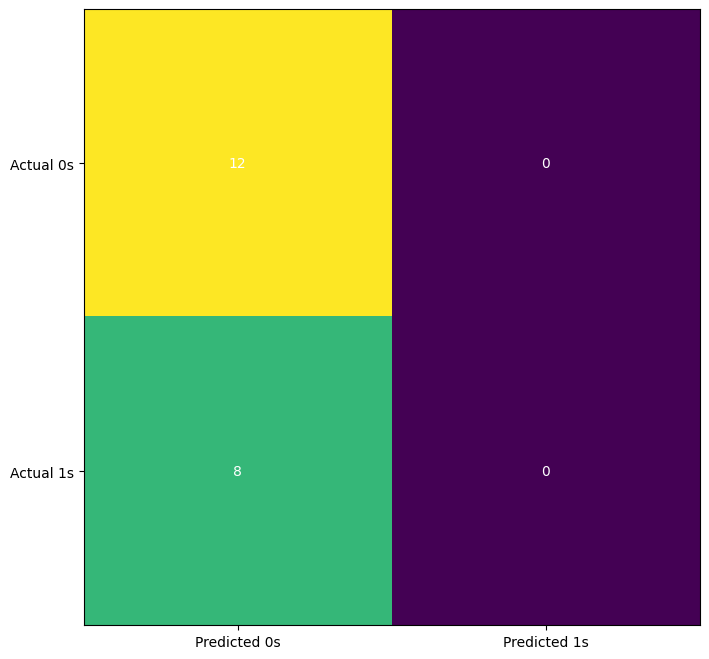

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
